In [1]:

def read_auto(pathName = "c:\dat203.1x\mod4", fileName = "Automobile price data _Raw_.csv"):
    ## Load the data  
    import pandas as pd
    import numpy as np
    import os

    ## Read the .csv file
    pathName = pathName
    fileName = fileName
    filePath = os.path.join(pathName, fileName)
    auto_price = pd.read_csv(filePath)

    ## Convert some columns to numeric values
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    auto_price[cols] = auto_price[cols].convert_objects(convert_numeric = True)
    
    ## Remove rows with missing values
    auto_price.dropna(axis = 0, inplace = True)

    ## Compute the log of the auto price
    auto_price['lnprice'] = np.log(auto_price.price)

    ## Create a column with new levels for the number of cylinders
    auto_price['num-cylinders'] = ['four-or-less' if x in ['two', 'three', 'four'] else 
                                 ('five-six' if x in ['five', 'six'] else 
                                 'eight-twelve') for x in auto_price['num-of-cylinders']]
    return auto_price



In [2]:
auto_price = read_auto(r"C:\Users\aaaaaaaa\Desktop\DAT 203.1\Mod4")

c:\users\aaaaaaaa\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [3]:
auto_price.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
lnprice              float64
num-cylinders         object
dtype: object

In [4]:
## Numeric columns
plot_cols = ["wheel-base",
              "width",
              "height",
              "curb-weight",
              "engine-size",
              "bore",
              "compression-ratio",
              "city-mpg",
              "price",
              "lnprice"]
 
## Create pair-wise scatter plots         
def auto_pairs(plot_cols, df):
    %matplotlib inline
    import matplotlib.pyplot as plt
    from pandas.tools.plotting import scatter_matrix
    fig = plt.figure(figsize=(12, 12))
    fig.clf()
    ax = fig.gca()
    scatter_matrix(df[plot_cols], alpha=0.3, 
               diagonal='kde', ax = ax)
    return 'Done'           

## Define columns for making a conditioned histogram
plot_cols2 = ["length",
               "curb-weight",
               "engine-size",
               "city-mpg",
               "price"]

## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    % matplotlib inline
    import matplotlib.pyplot as plt
    import pandas.tools.rplot as rplot
    ## Loop over the list of columns
    for col in plot_cols:
        ## Define figure
        fig = plt.figure(figsize=(14, 4))
        fig.clf()
        ax = fig.gca()
        ## Setup plot and grid and plot the data
        plot = rplot.RPlot(df, x = col, 
                                  y = '.') 
        plot.add(rplot.TrellisGrid(['.', grid_col]))
        plot.add(rplot.GeomHistogram())
        ax.set_title('Histograms of ' + col + ' conditioned by ' + grid_col + '\n')
        plot.render()
    return grid_col        


## Create boxplots of data
def auto_boxplot(df, plot_cols, by):
    % matplotlib inline
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of ' + col + ' by ' + by)
        ax.set_ylabel(col)
    return by    

## Define columns for making scatter plots
plot_cols3 = ["length",
               "curb-weight",
               "engine-size",
               "city-mpg"] 
               
## Create scatter plot
def auto_scatter(df, plot_cols):
    % matplotlib inline
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red') 
        ax.set_title('Scatter plot of price vs. ' + col)
    return plot_cols
 
               
## Create conditioned scatter plots
def auto_scatter_cond(df, plot_cols, y, cond_var1, cond_var2):
    for col in plot_cols:
        condPltsCol(df, col, y, cond_var1, cond_var2)
    return cond_var1, cond_var2

def condPltsCol(df, col1, col2, var1, var2):
    % matplotlib inline
    import matplotlib.pyplot as plt
    
    ## Find the levels of the conditioning variables
    levs1 = df[var1].unique().tolist()
    num1 = len(levs1)
    levs2 = df[var2].unique().tolist()
    num2 = len(levs2)   
    
    ## Determine the limits for the plots
    xlims = (df[col1].min(), df[col1].max())
    ylims = (df[col2].min(), df[col2].max())
    
    ## Define a figure and axes for the plot
    fig, ax = plt.subplots(num1, num2, figsize = (12, 8))

    ## Loop over conditioning variables subset the data
    ## and set create scatter plots for each conditioning
    ## variable pair and with data both gas and diesel cars    
    for i, val1 in enumerate(levs1):
        for j, val2 in enumerate(levs2):
            temp1 = df.ix[(df[var1] == val1) & (df[var2] == val2) & (df['fuel-type'] == 'gas')]       
            temp2 = df.ix[(df[var1] == val1) & (df[var2] == val2) & (df['fuel-type'] == 'diesel')]
            if temp1.shape[0] > 0:                    
                temp1.plot(kind = 'scatter', x = col1, y = col2 , ax = ax[i,j],
                          xlim = xlims, ylim = ylims, color = 'DarkBlue')                          
            if temp2.shape[0] > 0:                    
                temp2.plot(kind = 'scatter', x = col1, y = col2 , ax = ax[i,j],
                          xlim = xlims, ylim = ylims, color = 'Red')    
            ax[i,j].set_title(val1 + ' and ' + val2 )
            ax[i,j].set_xlabel('')
    
    ## Some lables for the x axis    
    ax[i,j].set_xlabel(col1)
    ax[i,(j-1)].set_xlabel(col1)
    return col1, col2
    

c:\users\aaaaaaaa\appdata\local\programs\python\python35-32\lib\site-packages\pandas\tools\plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


ImportError: cannot import name 'moduleTNC'

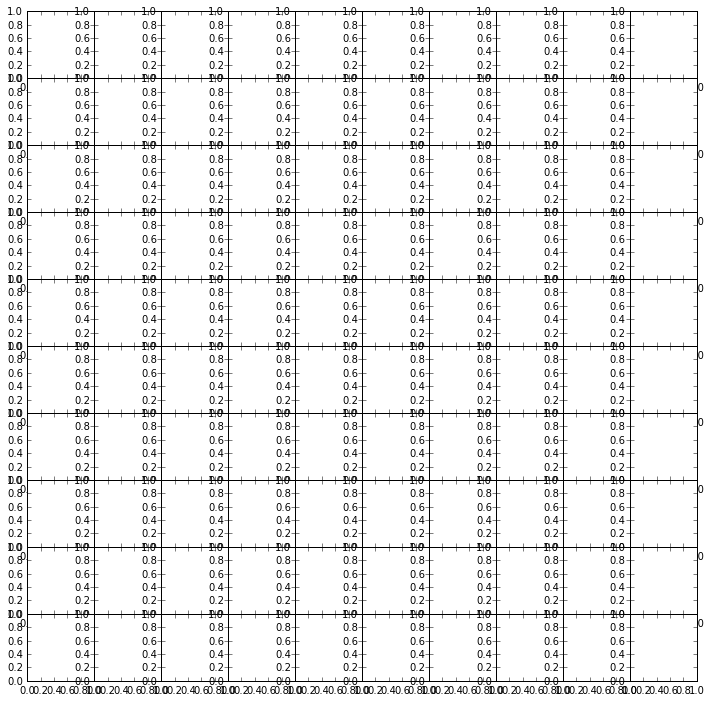

In [5]:
auto_pairs(plot_cols, auto_price)

c:\users\aaaaaaaa\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:36: FutureWarning: 
The rplot trellis plotting interface is deprecated and will be removed in a future version. We refer to external packages like seaborn for similar but more refined functionality. 

See our docs http://pandas.pydata.org/pandas-docs/stable/visualization.html#rplot for some example how to convert your existing code to these packages.


'drive-wheels'

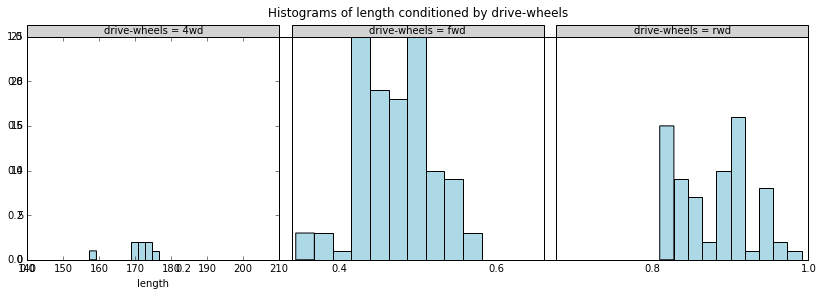

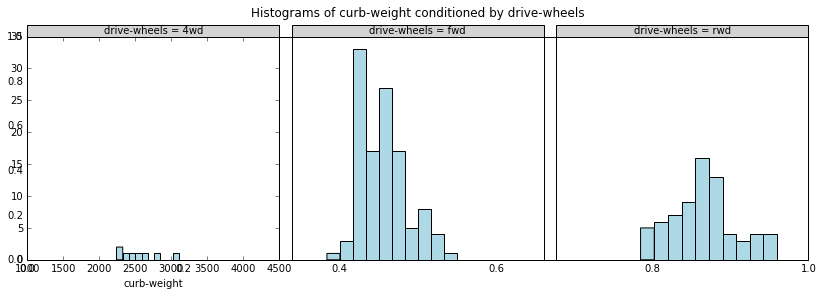

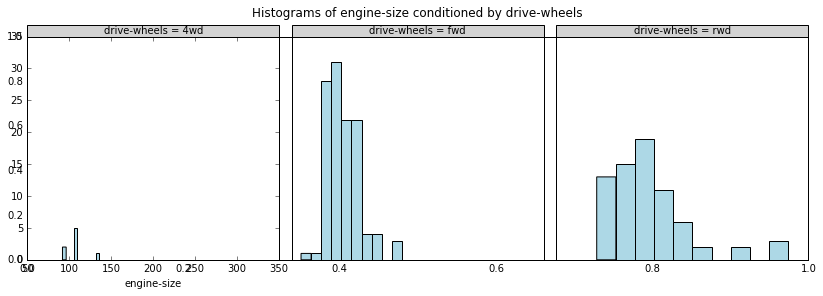

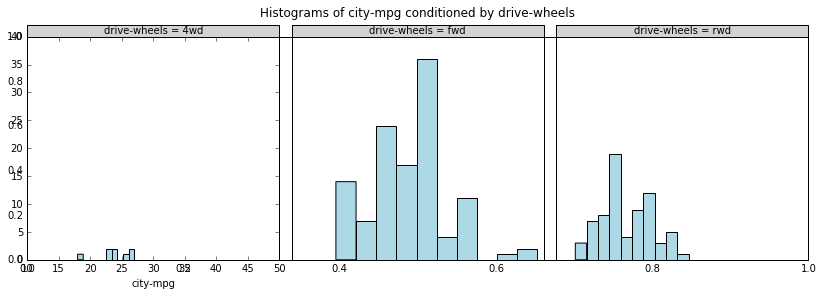

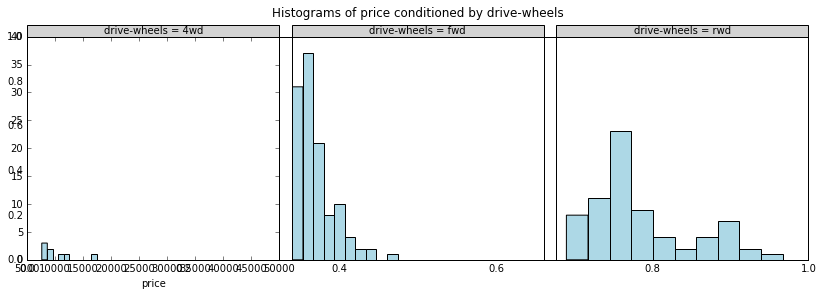

In [6]:
cond_hists(auto_price, plot_cols2, 'drive-wheels')